# CP1 Blatt6 Abgabe Lapp & Brieden
erstellt von Tobias Lapp und Sven Brieden am 30.11.2017

In [89]:
import scipy  as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy import optimize as op
from scipy.optimize import fmin
%matplotlib inline
############## für 3d-Plot#################
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

plt.rcParams['figure.figsize'] = (15.0, 4.0)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 16

# Aufgabe 6.1 Many body equilibria in 2d

harmonic potential:  $V_h = \dfrac{\vec{x}^2}{2}$  <br\>
repulsive potential: $V_{12}(\vec{x}_1 , \vec{x}_2 ) = − \text{log}|\vec{x_1} − \vec{x_2} |$

$V(\vec{x_i}) = \vec{x_i}^2\cdot 0.5 + \sum^N_{i\neq j}- \text{log}|\vec{x_i} -\vec{x_j}|$


Abstand bei 2 Teilchen:
array([[-1.46426607,  0.09600236],
       [ 1.46510001, -0.0821271 ]])

In [46]:
    
    def dV_dx(x_i):
    dV_dx = x_i
    for x_j in x_alle:
        dV_dx += (x_j - x_i)/abs(x_j - x_i)**2
    return dV_dx
def d2V_dx2(x_i):
    d2V_dx2 = 1
    for x_j in x_alle:
        d2V_dx2 += (x_i - x_j)**2/abs(x_i - x_j)**4
    return d2V_dx2


Die Distanz zum Mittelpunkt ist bei 2 Teilchen gemittelt: 0.7175


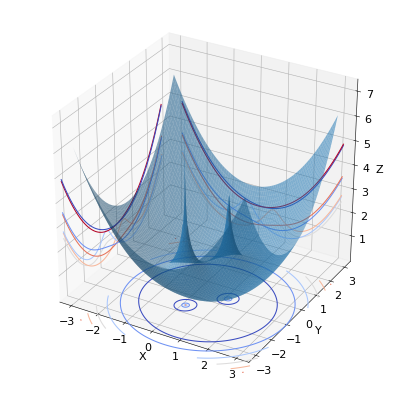

Die Distanz zum Mittelpunkt ist bei 3 Teilchen gemittelt: 0.9997


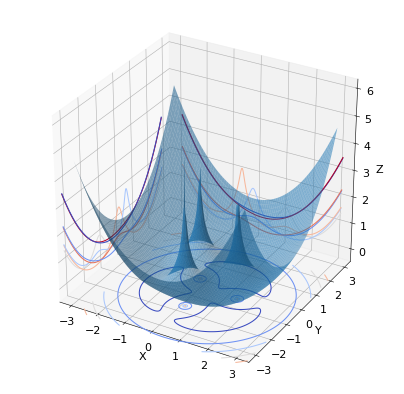

Die Distanz zum Mittelpunkt ist bei 4 Teilchen gemittelt: 1.2248


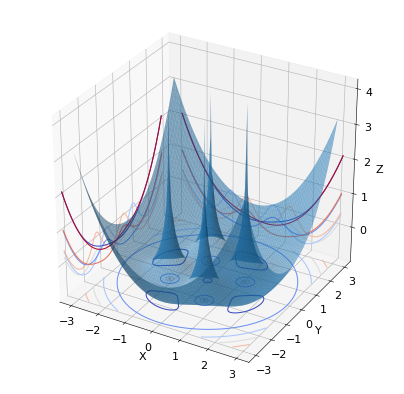

In [481]:
Vp = lambda x: np.linalg.norm(x)**2 / 2
Vpp = lambda x1, x2: -np.log(np.linalg.norm(x1-x2))  

def V(neue_position, particle_nr, dim):
    position = x_liste[i,particle_nr]
    position[dim] = neue_position
    V = Vp(position)
    for particle in range(N):
        if particle != particle_nr:
            V += Vpp(position, x_liste[i, particle]) 
    return V

gridpoints = 600
x_grid,y_grid = np.linspace(-3,3,gridpoints), np.linspace(-3,3,gridpoints)
X,Y = np.meshgrid(x_grid, y_grid)#, sparse=True)
Z = np.zeros([600,600])

for N in [2,3,4]:
    x_start = np.random.rand(N,2)*2 -1
    iterations = int(N * N /2) 
    x_liste = np.zeros([iterations + 1,N, 2])
    x_liste[0] = x_start
    for i in range(iterations):
        for part in range(N):
            x_liste[i+1,part,0] = fmin(V,x_liste[i,part,0],args=(part,0,),disp=0)
            x_liste[i+1,part,1] = fmin(V,x_liste[i,part,1],args=(part,1,),disp=0)

    for k in range(Z.shape[0]):
        for l in range(Z.shape[1]):
            Z[k,l] = V_plot(np.array([X[k,l],Y[k,l]]))

    print("Die Distanz zum Mittelpunkt ist bei %i Teilchen gemittelt: %.4f"%(N,np.mean([np.linalg.norm(x_liste[-1,o]) for o in range(N)])))            
    plot_3d_special()

In [477]:
def plot_2d():
    V_probe = np.zeros(100)
    x_probe = np.linspace(-4,4, 100)
    for i in range(100):
        V_probe[i] = V(x_probe[i],2,0)
        plt.plot(x,V_probe)
        plt.vlines(x_new, 0,5)
        plt.show()
        plt.scatter(x_liste[:-1,0], x_liste[:-1,1])
        plt.scatter(x_new,x_liste[-1,1])
    
def plot_3d():    
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.7)

def plot_3d_special():

    fig = plt.figure(figsize = (10,10), dpi=50)
    ax = fig.gca(projection='3d')
#    ax.plot_surface(X, Y, Z, alpha=0.8)
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.55)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-3.5, cmap=cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='y', offset=3.5, cmap=cm.coolwarm)
    ax.set_xlabel('X')
    #ax.set_xlim(-10, 10)
    ax.set_ylabel('Y')
    #ax.set_ylim(-10, 10)
    ax.set_zlabel('Z')
    #ax.set_zlim(-10, 10)
    plt.show()

def Konturlinie():
    fig = plt.figure(figsize = (6,6))
    plt.contour(X,Y,Z, 30)
    for no in range(N):
        plt.scatter(x_liste[:,no,0], x_liste[:,no,1],marker="x")

def V_plot(position):
    V = Vp(position)
    for particle in range(N):
            V += Vpp(position, x_liste[i,particle]) 
    return V

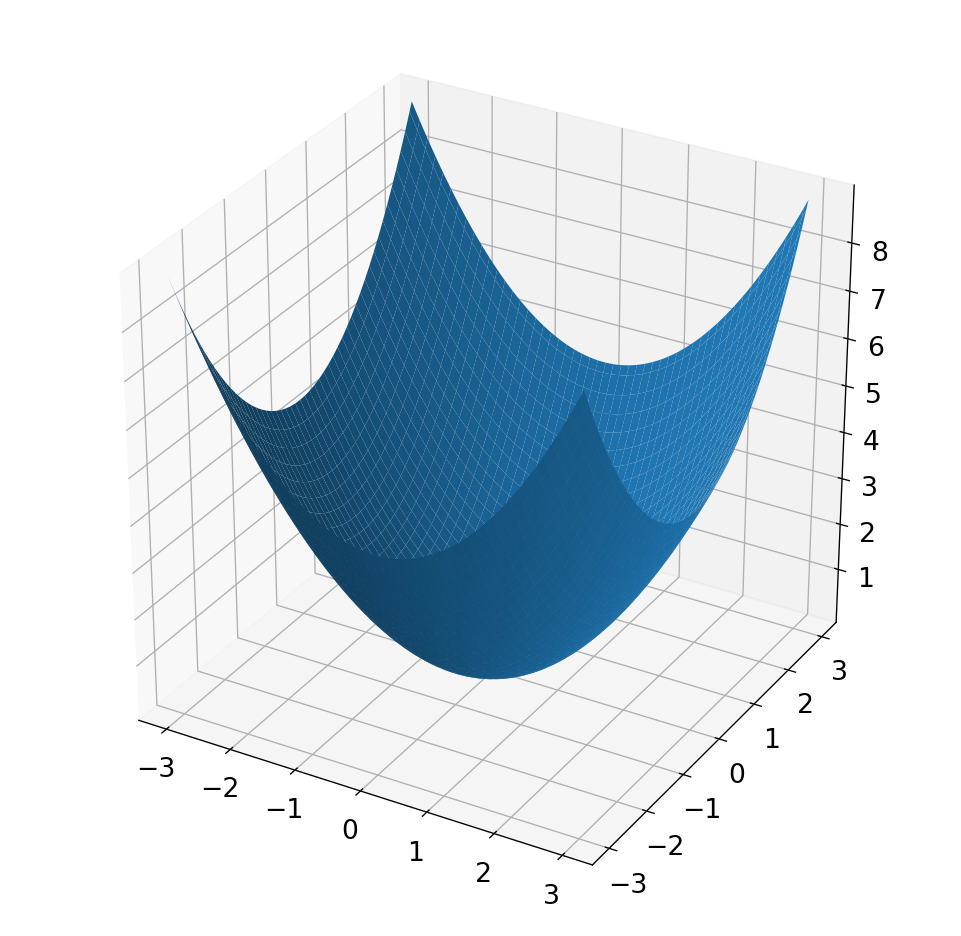

# Aufgabe 6.2. LU decomposition for tridiagonal matrices

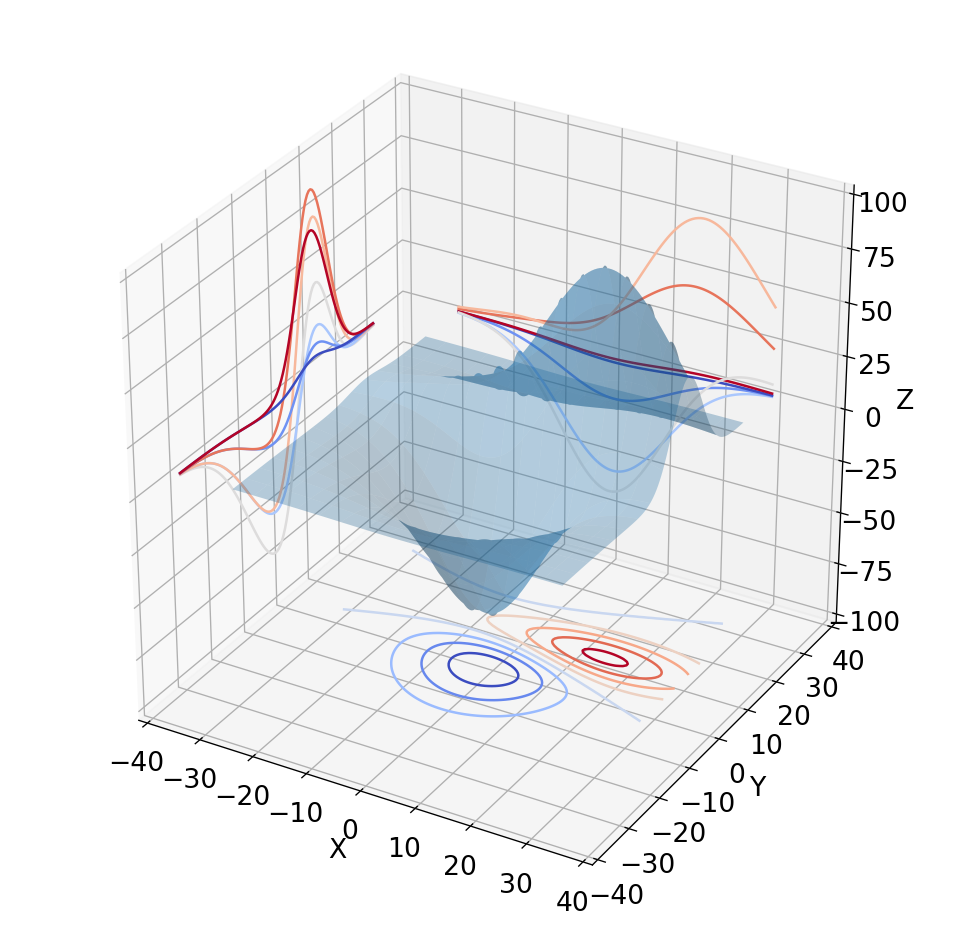

In [22]:
plot()